In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1. Binary Logistic

$$
p(y=1|x) = \sigma(w^Tx) = \frac{1}{1 + e^{-w^Tx}} \\
 \\
p(y=0|x) = 1 - p(y=1|x)
 \\
$$

Therefore, $y_n \sim Bern(n, p_n)$

$$
p(y_n= y|x_n) = p_n^{y_n} (1 - p_n)^{1 - y_n} = \sigma(w \cdot x_n)^{y_n} (1 - \sigma(w \cdot x_n))^{1 - y_n}
$$

The negative log-likelihood function is

$$
NLL(\theta) = -\sum^N  y_n log(p(x_n)) - (1 - y_n)log(1 - p(x_n)) \\
$$

In [3]:
def logistic(z):
    return 1 / (1 + np.exp(-z))


class BinaryLogistic:
    def __init__(self):
        pass

    def fit(self, X, y, ln=0.001, iters=10):
        N, D = X.shape

        theta_hat = np.random.randn(D)
        for i in range(iters):
            print('BCE', self.crossEntropyLoss(X, y, theta_hat))
       
            p = logistic(X @ theta_hat)
            grad = X.T @ (p - y)
            theta_hat -= ln * grad

        self.theta_hat = theta_hat

    def crossEntropyLoss(self, X, y, theta):
        """
        Negative Loss function
        """
        epsilon = 1e-12

        p = logistic(X @ theta)

        cost = -np.average(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))

        return cost

    
    def prob(self, X_test):
        self.p = logistic(X_test @ self.theta_hat)
        return self.p.round()


## Real Data

In [4]:
digits = datasets.load_digits(2) # binary classificatin (0 or 1)

X, y = digits.data, digits.target
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28)

X_train.shape, y_train.shape, X_test.shape


/Users/wuxiaopan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_class=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


((259, 65), (259,), (101, 65))

In [5]:

binary_model = BinaryLogistic()

binary_model.fit(X_train, y_train)

binary_model.theta_hat


BCE 14.901754874815197
BCE 13.868852297569818
BCE 6.957870844883697
BCE 1.5087469923664973
BCE 0.18503044234062058
BCE 0.15197248972137015
BCE 0.1195621870020534
BCE 0.11547517390019794
BCE 0.11331837736727626
BCE 0.11203724941947998


array([ 2.48951843e-01,  2.17734610e+00,  8.06015587e-01, -1.03437999e+00,
       -9.05772856e-02,  2.03101491e+00, -9.32049383e-02,  1.37344358e+00,
       -1.51800029e+00,  1.89954702e+00,  1.16494078e+00, -1.16441608e+00,
       -2.29193975e-01, -5.45792512e-01,  6.34280687e-02, -6.00300470e-02,
        1.63790255e+00,  1.09773205e-02,  1.14289258e-02, -3.59120631e-01,
        1.64882523e+00,  1.83996634e+00, -2.22533703e+00, -2.63995934e-02,
        7.39683479e-01, -9.47871073e-01, -6.96603201e-01,  6.73945014e-01,
        6.83980493e-01,  1.85907055e+00, -1.02730453e-03, -7.11148876e-01,
        1.34845376e+00,  1.68042049e+00, -6.32478631e-01, -6.88250308e-01,
        3.21382321e+00,  2.48434832e+00, -2.23689454e-01, -2.01307663e+00,
        5.56109620e-01, -1.14832534e+00, -3.31298067e+00, -1.06003216e+00,
        1.27841393e+00,  3.57360732e+00, -3.94011376e-02, -9.28201266e-01,
       -5.21547202e-01, -3.49631883e-01, -5.87507421e-01, -2.60607002e+00,
       -1.61761569e+00,  

In [6]:
print('correct num', np.sum(binary_model.prob(X_test) == y_test))

print('accuracy', np.mean(binary_model.prob(X_test) == y_test))

binary_model.crossEntropyLoss(X_test, y_test, binary_model.theta_hat)


correct num 100
accuracy 0.9900990099009901


0.022058743662158153

(array([[47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 54.]]),
 array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 <a list of 2 BarContainer objects>)

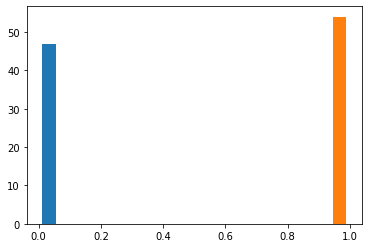

In [7]:
yhat = binary_model.prob(X_test)

fig, ax = plt.subplots()
bins = np.linspace(0, 1, 10)
ax.hist([binary_model.p[yhat == 0], binary_model.p[yhat == 1]], bins)


# 2. Softmax Regression

$$
y_i = \left[\matrix{y_{i1}\\y_{i2}\\...\\y_{ik}}\right] \rightarrow Softmax \rightarrow \left[\matrix{p_{i1}\\p_{i2}\\...\\p_{ik}}\right]
\\
L(\theta) = - \left[ \sum_{i=1}^{m} \sum_{k=1}^{K}  1\left\{y_{i} = k\right\} \log \frac{\exp(\theta^{(k)\top} \mathbf{x}_i)}{\sum_{j=1}^K \exp(\theta^{(j)\top} \mathbf{x}_i)}\right]
\\
\nabla_{\theta^{(k)}} L(\theta) = - \sum_{i=1}^{m}{ \left[ \mathbf{x}_i \left( 1\{ y_i = k\}  - P(y_i = k | \mathbf{x}_i; \theta) \right) \right]  }
$$

In [45]:
"""
X = N x D
theta = D x K
y, N x K, one hot encoding

Z = X @ theta, N x K
"""

def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

def softmax(Z):
    return np.exp(Z) / np.exp(Z).sum(1).reshape(-1, 1)


def softmax_loss(X, y, theta):
    p = softmax(X @ theta)
    return -np.trace(np.log(p) @ y.T)


def softmax_gradient(X, y, theta):
    p = softmax(X @ theta)
    return - X.T @(y - p)


## Real Data

In [57]:
# Example 1
digits = datasets.load_digits(10) 

X, y = digits.data, digits.target
X = np.c_[np.ones(X.shape[0]), X]
X /= 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28)
y_train = get_one_hot(y_train, 10)

X_train.shape, y_train.shape, X_test.shape


((1293, 65), (1293, 10), (504, 65))

In [59]:
alpha = 0.1
theta_gd = np.random.randn(X_train.shape[1], 10)

for e in range(0, 2000):
    gr = softmax_gradient(X_train, y_train, theta_gd)
    theta_gd -= alpha * gr

    if e%100 == 0:
        print("Training Loss: ", softmax_loss(X_train, y_train, theta_gd))

# # Compute the accuracy of the test set
proba = softmax(X_test @ theta_gd)

print()
print('accuracy:', float((proba.argmax(1) - y_test==0).sum()) / float(proba.shape[0]))


Training Loss:  2856.129938971855
Training Loss:  517.4721114519238
Training Loss:  345.90147572277914
Training Loss:  276.81652058584007
Training Loss:  237.47493401527385
Training Loss:  211.2931293144157
Training Loss:  192.2220692608446
Training Loss:  177.48559215078217
Training Loss:  165.61643385877508
Training Loss:  155.7601622008176
Training Loss:  147.38252779452506
Training Loss:  140.13073481586198
Training Loss:  133.76149095870562
Training Loss:  128.1009739368276
Training Loss:  123.02125844299945
Training Loss:  118.4257740795297
Training Loss:  114.23998073175638
Training Loss:  110.40519378008105
Training Loss:  106.87438422783967
Training Loss:  103.60925774844804

accuracy: 0.9623015873015873


In [77]:
# Example 2: import data
wine = datasets.load_wine()
X = wine['data']
y = wine['target']

def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd 

K = len(np.unique(y))
X = standard_scaler(X) 
X_train = np.c_[np.ones(X.shape[0]), X]
y_train = get_one_hot(y, K)

X_train.shape, y_train.shape


((178, 14), (178, 3))

In [78]:
alpha = .0001
theta_gd = np.random.randn(X_train.shape[1], K)

for e in range(0, 10000):
    gr = softmax_gradient(X_train, y_train, theta_gd)
    theta_gd -= alpha * gr

    if e%1000 == 0:
        print("Training Loss: ", softmax_loss(X_train, y_train, theta_gd))

# # Compute the accuracy of the test set
proba = softmax(X_train @ theta_gd)

print('accuracy:', float((proba.argmax(1) - y ==0).sum()) / float(proba.shape[0]))


Training Loss:  636.4510125318758
Training Loss:  13.764993856288132
Training Loss:  8.064571203366159
Training Loss:  6.027095731402371
Training Loss:  4.93139319652375
Training Loss:  4.227586948348744
Training Loss:  3.727757194719059
Training Loss:  3.349416442277416
Training Loss:  3.0503178038979253
Training Loss:  2.8063675748083954
accuracy: 1.0
